In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from PIL import Image
import numpy as np
import os
from imutils import paths

In [ ]:
image_paths=paths.list_images("/content/drive/MyDrive/Dokumentasi revisi")

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Adadelta, Adamax, Nadam, Adagrad
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix, classification_report
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
import pandas as pd 

%matplotlib inline

In [ ]:
train_path = '/content/drive/MyDrive/Dokumentasi revisi/Dataset652510revisi/train'
val_path = '/content/drive/MyDrive/Dokumentasi revisi/Dataset652510revisi/val'
test_path = '/content/drive/MyDrive/Dokumentasi revisi/Dataset652510revisi/test'

In [ ]:
train_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['DoubleBottomTrainSet', 'DoubleTopTrainSet','HeadandShoulderTrainSet','InvertedHeadandShoulderTrainSet'], batch_size=16)
val_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input) \
    .flow_from_directory(directory=val_path, target_size=(224,224), classes=['DoubleBottomValset', 'DoubletopValSet','HeadandShoulderValSet','InvertedHeadandShoulderValSet'], batch_size=16)    
test_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['DoubleBottomTestSet', 'DoubleTopTestSet','HeadandShoulderTestSet','InvertedHeadandShoulderTestSet'], batch_size=16, shuffle=False)

Found 520 images belonging to 4 classes.
Found 100 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


In [ ]:
imgs, labels = next(train_batches)
print(labels)  

[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]


In [ ]:
chart = train_batches.class_indices.keys()
df = pd.DataFrame(chart)
print(df)

                                 0
0             DoubleBottomTrainSet
1                DoubleTopTrainSet
2          HeadandShoulderTrainSet
3  InvertedHeadandShoulderTrainSet


In [ ]:
base_model = keras.applications.MobileNet(weights="imagenet",include_top=False,input_shape=(224,224,3))

17235968/17225924 [==============================] - 0s 0us/step


In [ ]:
base_model.trainable = False
inputs = keras.Input(shape=(224,224,3))
x = base_model(inputs,training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Dense(4,activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=x, name="ChartPattern_MobileNet")
model.summary()

Model: "ChartPattern_MobileNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 4)                 4100      
                                                                 
Total params: 3,232,964
Trainable params: 4,

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
hist=model.fit(x = train_batches, 
          steps_per_epoch = len(train_batches),
          epochs = 100,
          validation_data = val_batches,
          validation_steps = len(val_batches),
          verbose = 1
         )

Epoch 1/100
33/33 [==============================] - 317s 9s/step - loss: 1.4619 - accuracy: 0.3404 - val_loss: 1.3043 - val_accuracy: 0.4200
Epoch 2/100
33/33 [==============================] - 2s 63ms/step - loss: 1.0911 - accuracy: 0.5058 - val_loss: 0.8302 - val_accuracy: 0.7200
Epoch 3/100
33/33 [==============================] - 2s 63ms/step - loss: 0.8502 - accuracy: 0.6635 - val_loss: 0.9046 - val_accuracy: 0.6500
Epoch 4/100
33/33 [==============================] - 2s 63ms/step - loss: 0.7821 - accuracy: 0.6962 - val_loss: 0.9412 - val_accuracy: 0.6300
Epoch 5/100
33/33 [==============================] - 2s 63ms/step - loss: 0.7092 - accuracy: 0.7269 - val_loss: 0.6651 - val_accuracy: 0.7600
Epoch 6/100
33/33 [==============================] - 2s 63ms/step - loss: 0.6113 - accuracy: 0.7635 - val_loss: 0.5948 - val_accuracy: 0.8100
Epoch 7/100
33/33 [==============================] - 2s 64ms/step - loss: 0.5708 - accuracy: 0.7712 - val_loss: 0.5555 - val_accuracy: 0.8400
Epoch 

Text(0.5, 1.0, 'Loss and Validation Loss MobileNet LR 0.001 (Adam)')

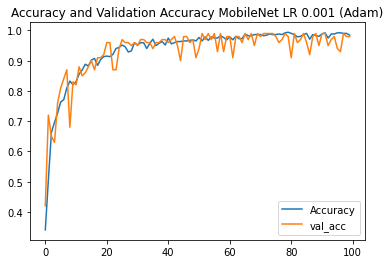

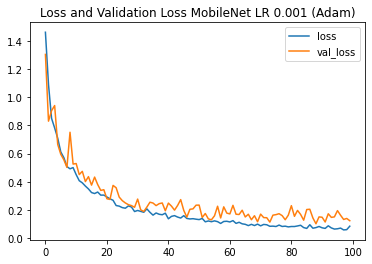

In [ ]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))
 
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.legend(["Accuracy","val_acc"])
plt.title('Accuracy and Validation Accuracy MobileNet LR 0.001 (Adam)')
 
plt.figure()
 
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.legend(["loss","val_loss"])
plt.title('Loss and Validation Loss MobileNet LR 0.001 (Adam)')

In [ ]:
model.save("mobnet.h5")

In [ ]:
chart = train_batches.class_indices.keys()
print(chart)

dict_keys(['DoubleBottomTrainSet', 'DoubleTopTrainSet', 'HeadandShoulderTrainSet', 'InvertedHeadandShoulderTrainSet'])


In [ ]:
test_batches.class_indices

{'DoubleBottomTestSet': 0,
 'DoubleTopTestSet': 1,
 'HeadandShoulderTestSet': 2,
 'InvertedHeadandShoulderTestSet': 3}

In [ ]:
predictions = model.predict(x=test_batches, verbose=0)

In [ ]:
y_true=test_batches.classes
y_pred=predictions.argmax(axis=1)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                           title='Confusion matrix',
                           cmap=plt.cm.Purples):
#     """
#     This function prints and plots the confusion matrix.
#     Normalization can be applied by setting `normalize=True`.
#     """
     plt.imshow(cm, interpolation='nearest', cmap=cmap)
     plt.title(title)
     plt.colorbar()
     tick_marks = np.arange(len(classes))
     plt.xticks(tick_marks, classes, rotation=45)
     plt.yticks(tick_marks, classes)

     if normalize:
         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
         print("Normalized confusion matrix")
     else:
         print('Confusion matrix, without normalization')

     print(cm)

     thresh = cm.max() / 2.
     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
         plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

     plt.tight_layout()
     plt.ylabel('Actual label')
     plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[20  0  0  0]
 [ 0 20  0  0]
 [ 0  0 20  0]
 [ 0  0  0 20]]


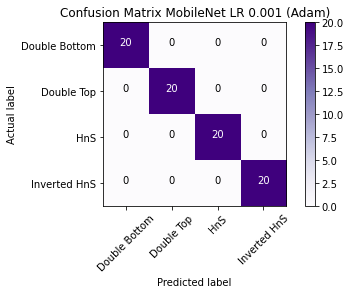

In [ ]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=predictions.argmax(axis=1))
cm_plot_labels = ['Double Bottom','Double Top','HnS','Inverted HnS']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix MobileNet LR 0.001 (Adam)')

In [ ]:
print (classification_report(y_true, y_pred,target_names=test_batches.class_indices))

                                precision    recall  f1-score   support

           DoubleBottomTestSet       1.00      1.00      1.00        20
              DoubleTopTestSet       1.00      1.00      1.00        20
        HeadandShoulderTestSet       1.00      1.00      1.00        20
InvertedHeadandShoulderTestSet       1.00      1.00      1.00        20

                      accuracy                           1.00        80
                     macro avg       1.00      1.00      1.00        80
                  weighted avg       1.00      1.00      1.00        80



In [ ]:
model.evaluate(test_batches)

5/5 [==============================] - 0s 52ms/step - loss: 0.0631 - accuracy: 1.0000


[0.06312597543001175, 1.0]

In [ ]:
import requests
from io import BytesIO

In [ ]:
# Parameters
input_size = (224,224)

#define input shape
channel = (3,)
input_shape = input_size + channel

#define labels
chart = ['Double Bottom', 'Double Top', 'Head and Shoulder', 'Inverted Head and Shoulder']

In [ ]:
def preprocess(img,input_size):
    nimg = img.convert('RGB').resize(input_size, resample= 0)
    img_arr = (np.array(nimg))/255
    return img_arr

def reshape(imgs_arr):
    return np.stack(imgs_arr, axis=0)

In [ ]:
from tensorflow.keras.models import load_model

# ada 2 cara load model, jika cara pertama berhasil maka bisa lasngusng di lanjutkan ke fungsi prediksi

MODEL_PATH = '/content/mobnet.h5'
model = load_model(MODEL_PATH,compile=False)

Inverted Head and Shoulder 0.9924515


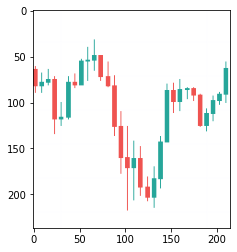

In [ ]:
# read image
im = Image.open('/content/drive/MyDrive/Dokumentasi revisi/Chartbefore/ihns/ihns48.png')
plt.imshow(im)
X = preprocess(im,input_size)
X = reshape([X])
y = model.predict(X)

print(chart[np.argmax(y)], np.max(y) )